In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\OnlineRetail.csv',encoding='latin1')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#1. Using the above data, find useful insights about the customer purchasing history
#that can be an added advantage for the online retailer.
#2. Segment the customers based on their purchasing behavior.

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
print("Percentage of customers missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Percentage of customers missing:  24.93 %


In [15]:
df['CustomerID_is_null'] = [1 if i == True else 0 for i in df.CustomerID.isnull()]

In [17]:
df1 = df[df['CustomerID_is_null'] == 1]

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           135080 non-null  object 
 1   StockCode           135080 non-null  object 
 2   Description         133626 non-null  object 
 3   Quantity            135080 non-null  int64  
 4   InvoiceDate         135080 non-null  object 
 5   UnitPrice           135080 non-null  float64
 6   CustomerID          0 non-null       float64
 7   Country             135080 non-null  object 
 8   CustomerID_is_null  135080 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 10.3+ MB


In [19]:
df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom,1
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom,1
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom,1
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom,1
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom,1
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom,1
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom,1


In [20]:
print("Number of orders in df1:", df1['InvoiceNo'].nunique())
print("Avg. number of products per order in df1: ", round(df1['StockCode'].count() / df1['InvoiceNo'].nunique(),2) )
print("Avg. number of products per order in df: ",  round(df['StockCode'].count() / df['InvoiceNo'].nunique(),2) )

Number of orders in df1: 3710
Avg. number of products per order in df1:  36.41
Avg. number of products per order in df:  20.92


Since the customer ID's are missing, 
lets assume these orders were not made by the customers already in the data set because those customers already have ID's.
We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 
Instead of dropping the null CustomerID values, let's assign those rows a unique customer ID per order.
This will act as a new customer for each unique order.

In [21]:
df['NewID'] = df['CustomerID']
df.loc[df['CustomerID_is_null'] == 1, ['NewID']] = df['InvoiceNo']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,17850.0


In [22]:
df['NewID'] = df['NewID'].astype(str).str.replace('\D+', '')
df['NewID'] = pd.to_numeric(df['NewID'])
df[df['NewID']== 580605]

C:\Users\Admin\AppData\Local\Temp\ipykernel_10260\2649434508.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['NewID'] = df['NewID'].astype(str).str.replace('\D+', '')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom,1,580605


Notice that NewID doesn't have any missing values, but the column includes object data types. 
As mentioned in the description of the dataset, if the invoice number starts with the letter "C", 
it means it the order was cancelled. All of the data types in the new customer ID column need to be numeric, 
so we need to first remove any "C" characters from the column.

In [23]:
Num_CustomerID = df['CustomerID'].nunique()
Num_df1_InvoiceNo = df1['InvoiceNo'].nunique()
Num_NewID = df['NewID'].nunique()
print("Number of Customers:", df['CustomerID'].nunique())
print("Number of Orders in df1:", df1['InvoiceNo'].nunique())
print("Number of Customers + Number of Orders in df1:", Num_CustomerID + Num_df1_InvoiceNo)
print("Number of New ID's:", df['NewID'].nunique())

Number of Customers: 4372
Number of Orders in df1: 3710
Number of Customers + Number of Orders in df1: 8082
Number of New ID's: 8082


In [24]:
df.describe()

,Quantity,UnitPrice,CustomerID,CustomerID_is_null,NewID
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,0.249267,253869.471330
std,218.081158,96.759853,1713.600303,0.432589,176036.804611
min,-80995.000000,-11062.060000,12346.000000,0.000000,123460.000000
25%,1.000000,1.250000,13953.000000,0.000000,143670.000000
50%,3.000000,2.080000,15152.000000,0.000000,162490.000000
75%,10.000000,4.130000,16791.000000,0.000000,182830.000000
max,80995.000000,38970.000000,18287.000000,1.000000,581498.000000


Negative Values
As mentioned above, if the invoice number starts with the letter "C", it means it the order was cancelled.

In [25]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,0,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,0,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,0,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,0,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,0,175480


In [26]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID


Since nothing came back when we filtered the cancelled orders by Quantity > 0,
this confirms that the negative values mean the order was cancelled.

In [27]:
print("There were", len(cancelled_orders), "cancelled orders.")
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 35.86% 


In [29]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,1,563186
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,1,563187


In [30]:
groupby_customers = pd.DataFrame(df.groupby('NewID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
NewID,
123460,2
123470,7
123480,4
123490,1
123500,1


In [31]:
groupby_customers.describe()

,InvoiceNo
count,8082.000000
mean,3.204652
std,7.162265
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,248.000000


In [32]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [33]:
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [34]:
groupby_ID = pd.DataFrame(df.groupby('NewID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
NewID,
123460,1
123470,103
123480,22
123490,73
123500,17


In [35]:
groupby_ID.describe()

,Number of Items per Customer
count,8082.000000
mean,49.759837
std,91.220932
min,1.000000
25%,1.000000
50%,17.000000
75%,58.000000
max,1794.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


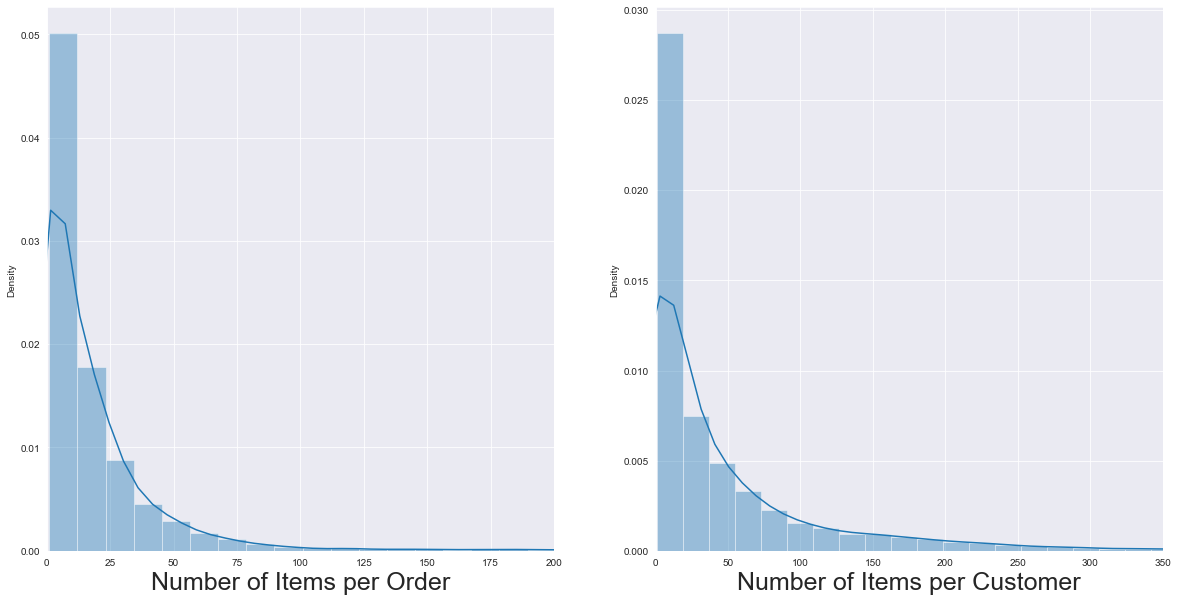

In [37]:
import seaborn as sns
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

Customers by country

In [38]:
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,178500,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,178500,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,178500,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,178500,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,178500,20.34


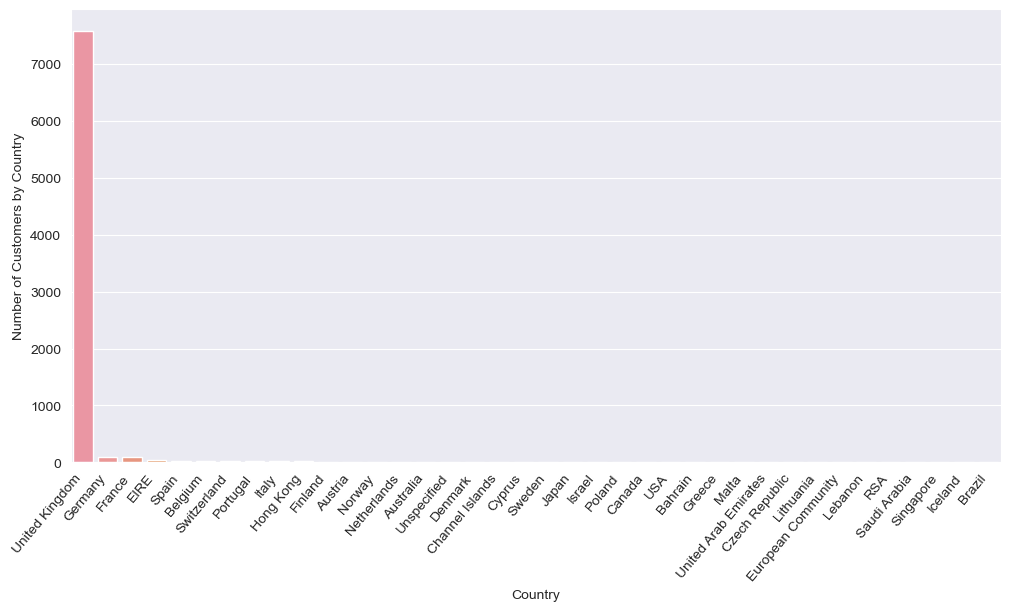

In [40]:
country_df = pd.DataFrame(df.groupby('Country')['NewID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

The United Kingdom has significantly more customers than the other countries in our data set, 
so their total cost should look similar.

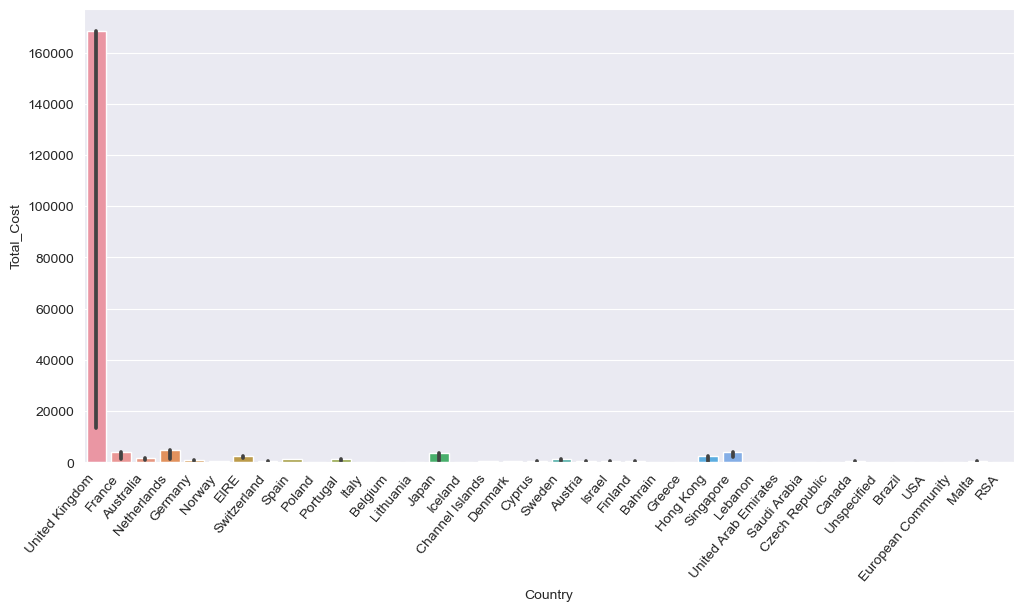

In [41]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=df, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

The UK not only has the most sales revenue, but also the most customers. 
Since the majority of this data set contains orders from the UK, 
we can explore the UK market further by finding out what products the customers buy together and
any other buying behaviors to improve our sales and targeting strategy.

In [42]:
df_uk = df[df['Country']=='United Kingdom']
df_uk.describe()

,Quantity,UnitPrice,CustomerID,CustomerID_is_null,NewID,Total_Cost
count,495478.000000,495478.000000,361878.000000,495478.000000,495478.000000,495478.000000
mean,8.605486,4.532422,15547.871368,0.269639,264016.667176,16.525065
std,227.588756,99.315438,1594.402590,0.443772,179302.718367,394.839116
min,-80995.000000,-11062.060000,12346.000000,0.000000,123460.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,0.000000,146390.000000,3.290000
50%,3.000000,2.100000,15514.000000,0.000000,166390.000000,8.290000
75%,10.000000,4.130000,16931.000000,1.000000,538566.000000,16.630000
max,80995.000000,38970.000000,18287.000000,1.000000,581498.000000,168469.600000


In [43]:
print("Percentage of customers from the UK: ", round(df_uk['NewID'].nunique() * 100 / df['NewID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['NewID'].nunique())

Percentage of customers from the UK:  93.88 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 7587


In [55]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', \
                                                                                                      ascending=False)
uk_product.head(5)

,StockCode,Description,Quantity
2587,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2089,23166,MEDIUM CERAMIC TOP STORAGE JAR,76919
3005,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182
3427,85099B,JUMBO BAG RED RETROSPOT,41981
3442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34648


In [84]:
import time
import datetime as dt
from pandas.plotting import scatter_matrix
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')

In [85]:
df_uk.shape

(354345, 11)

In [86]:
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(354345, 11)

In [87]:
df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
df_uk.shape

(354345, 11)

In [88]:
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products bought: ",df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_uk['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Number of transactions:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %


a. Recency: Days since last purchase
To calculate recency, we need to choose a date as a point of reference to evaluate 
how many days ago was the customer's last purchase.

In [136]:
df_uk['InvoiceDate'].max()

'9/9/2011 9:52'

In [137]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [138]:
df_uk['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date
df_uk['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

In [139]:
df_recency = df_uk.groupby(by='CustomerID', as_index=False)['Dates'].max()
df_recency.columns = ['CustomerID', 'Last_Purchase_Date']
df_recency.head()

,CustomerID,Last_Purchase_Date
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [140]:
df_recency['Recency'] = df_recency['Last_Purchase_Date'].apply(lambda x: (now - x).days)
df_recency.head()

,CustomerID,Last_Purchase_Date,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [141]:
df_recency.drop('Last_Purchase_Date', axis=1, inplace=True)

b. Frequency: Number of purchases
To calculate how many times a customer purchased something, we need to count how many invoices each customer has.

In [142]:
df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
df_frequency = df_uk_copy.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


c. Monetary: Total amount of money spent
The monetary value is calculated by adding together the cost of the customers' purchases.
We already did this when we created the column Total_Cost

In [143]:
df_monetary = df_uk.groupby(by='CustomerID',as_index=False).agg({'Total_Cost': 'sum'})
df_monetary.columns = ['CustomerID', 'Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


Create RFM Table

In [144]:
df_merge = df_recency.merge(df_frequency, on='CustomerID')
df_merge.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,210
3,12749.0,3,5
4,12820.0,3,4


Customer Segmentation with RFM Model
RFM Scoring
The simplest way to create customer segments from an RFM model is by using Quartiles.
We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. 
The final RFM score is calculated by combining the individual RFM values.

In [155]:
df_rfm = df_merge.merge(df_monetary,on='CustomerID')
df_rfm.set_index('CustomerID',inplace=True)
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


In [156]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.7
0.50,50.0,2.0,45.4
0.75,142.0,5.0,124.5


In [157]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.4, 0.75: 124.5}}

In [158]:
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [159]:
rfm_segmentation = df_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMscore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMscore, args=('Monetary',quantiles))

In [160]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,11,689.49,4,4,4
12748.0,0,210,3841.31,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


In [161]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


In [162]:
rfm_segmentation[rfm_segmentation['RFM_Score']=='444'].head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12828.0,2,6,154.80,4,4,4,444
12839.0,2,14,233.91,4,4,4,444
12841.0,4,25,328.74,4,4,4,444
12877.0,3,12,365.79,4,4,4,444
12901.0,8,28,9230.45,4,4,4,444
12919.0,8,6,267.40,4,4,4,444
12921.0,9,37,1014.11,4,4,4,444


In [164]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='111']))

Best Customers:  370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377


Applying K-Means Clustering on RFM Variables

In [165]:
rfm_data = df_rfm.drop(['R_Quartile','F_Quartile','M_Quartile','RFM_Score'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


In [166]:
rfm_data.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.273779,-0.030123
Frequency,-0.273779,1.000000,0.163225
Monetary,-0.030123,0.163225,1.000000


<AxesSubplot:>

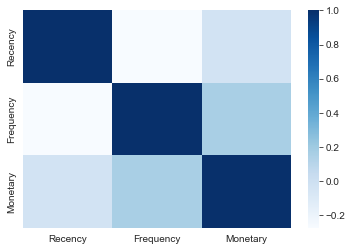

In [167]:
sns.heatmap(rfm_data.corr(),cmap="Blues")

Looking at this heatmap, we see that there is a negative correlation between Recency : Frequency and Recency : Monetary, 
but there is a positive correlation between Frequency : Monetary

array([[<AxesSubplot:xlabel='Recency', ylabel='Recency'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Recency'>,
        <AxesSubplot:xlabel='Monetary', ylabel='Recency'>],
       [<AxesSubplot:xlabel='Recency', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Monetary', ylabel='Frequency'>],
       [<AxesSubplot:xlabel='Recency', ylabel='Monetary'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Monetary'>,
        <AxesSubplot:xlabel='Monetary', ylabel='Monetary'>]], dtype=object)

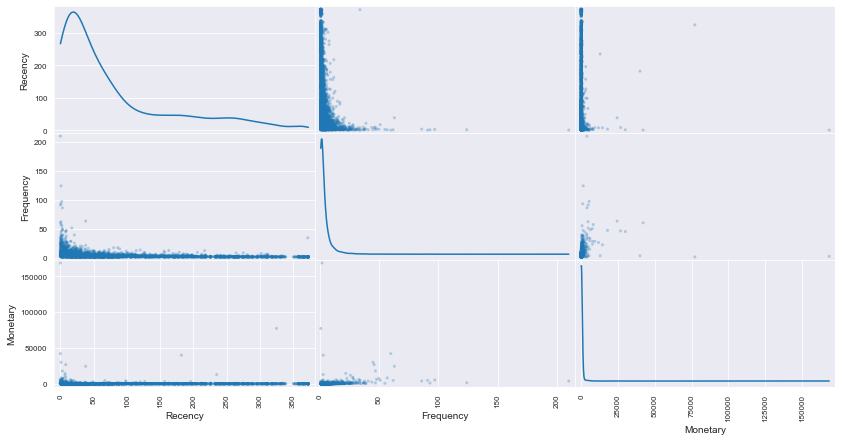

In [168]:
scatter_matrix(rfm_data, alpha = 0.3, figsize = (14,7), diagonal = 'kde')

In [169]:
rfm_r_log = np.log(rfm_data['Recency']+0.1)
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

In [170]:
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

In [171]:
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12747.0,6.536097,0.741937,2.397895
12748.0,8.253595,-2.302585,5.347108
12749.0,4.589549,1.131402,1.609438
12820.0,4.065602,1.131402,1.386294


array([[<AxesSubplot:xlabel='Monetary', ylabel='Monetary'>,
        <AxesSubplot:xlabel='Recency', ylabel='Monetary'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Monetary'>],
       [<AxesSubplot:xlabel='Monetary', ylabel='Recency'>,
        <AxesSubplot:xlabel='Recency', ylabel='Recency'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Recency'>],
       [<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Recency', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Frequency'>]],
      dtype=object)

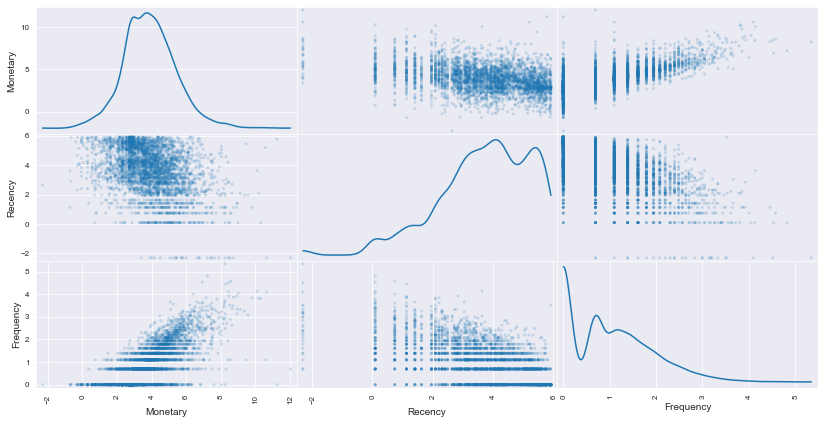

In [172]:
scatter_matrix(log_data, alpha = 0.2, figsize = (14,7), diagonal = 'kde')

The distributions of Monetary and Recency are more normailized, but recency is skewed to the right. 
Frequency was also skewed left because of a lot of customers only buying from us onece.

<AxesSubplot:>

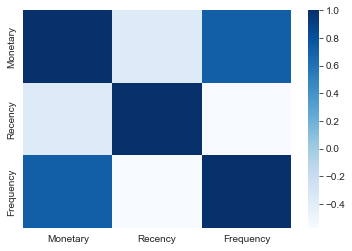

In [173]:
sns.heatmap(log_data.corr(),cmap="Blues")

In [174]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.368472,0.716935
Recency,-0.368472,1.000000,-0.573982
Frequency,0.716935,-0.573982,1.000000


K-Means Implementation

In [178]:
matrix = log_data.values
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3892274766708355
For n_clusters = 3 The average silhouette_score is : 0.30230419373932144
For n_clusters = 4 The average silhouette_score is : 0.31216677157694256
For n_clusters = 5 The average silhouette_score is : 0.29159419000020803
For n_clusters = 6 The average silhouette_score is : 0.2971152471373454
For n_clusters = 7 The average silhouette_score is : 0.29403208245088713
For n_clusters = 8 The average silhouette_score is : 0.2887001752369338
For n_clusters = 9 The average silhouette_score is : 0.29047953296586465


In [179]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.389


Text(0, 0.5, 'Monetary')

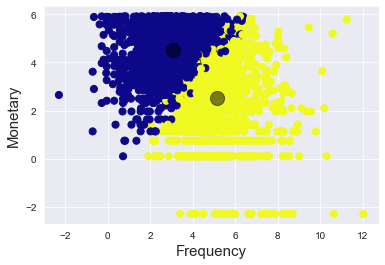

In [180]:
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

In [181]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

,0,1
Number Customers,2359,1562


CONCLUSION
we were able to build a model that can classify new customers into "low value" and "high value" groups. Generally,
if a customer only transacted with us a few times, 
they needed to be at least in the top 50th percentile in monetary spending to be considered a "high value customer". 